In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


print('主題: 用隨機森林預測某日最高氣溫')
features=pd.read_csv(r'C:\Users\user\PycharmProjects\MachineLearnig\temps.csv')
print(features.head())

'''
temp_1: 前天最高溫
temp_2: 昨天最高溫
average: 在過去，每年這一天的平均最高溫
actual: 當天最高溫
frien: 朋友對當天最高溫的猜測值
'''

'''查看資料規模'''
print()
print('資料維度:',features.shape)

'''觀察各特徵的數據統計量'''
print()
print(features.describe())

'''各特徵的數量都是 348，表示數據無遺失值'''




主題: 用隨機森林預測某日最高氣溫
   year  month  day  week  temp_2  temp_1  average  actual  friend
0  2016      1    1   Fri      45      45     45.6      45      29
1  2016      1    2   Sat      44      45     45.7      44      61
2  2016      1    3   Sun      45      44     45.8      41      56
3  2016      1    4   Mon      44      41     45.9      40      53
4  2016      1    5  Tues      41      40     46.0      44      41

資料維度: (348, 9)

         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.511494   62.560345   59.760632   
std       0.0    3.498380    8.772982   11.813019   11.767406   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.00000

'各特徵的數量都是 348，表示數據無遺失值'

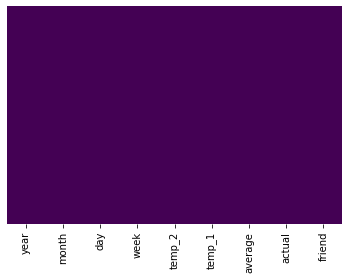

In [4]:
'''用熱力圖查看是否有遺失值'''
import seaborn as sns
sns.heatmap(features.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0), datetime.datetime(2016, 1, 3, 0, 0), datetime.datetime(2016, 1, 4, 0, 0), datetime.datetime(2016, 1, 5, 0, 0)]


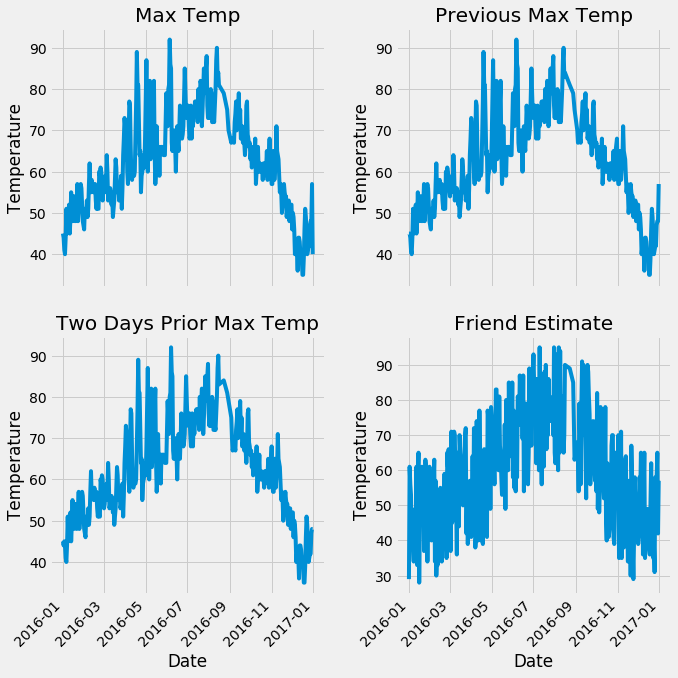

In [6]:
'''處理時間資料'''
import datetime

'''把時間的行個別列出'''
years=features['year']
months=features['month']
days=features['day']

'''轉 datetime 格式以便用於繪圖或計算'''
dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day
       in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d')for date in dates]
print(dates[:5])

plt.style.use('fivethirtyeight')

'''設置子圖'''
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))

'''x點的名稱旋轉 45 度'''
fig.autofmt_xdate(rotation=45)

'''標籤值'''
ax1.plot(dates,features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature')
ax1.set_title('Max Temp')

'''昨天最高溫'''
ax2.plot(dates,features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature')
ax2.set_title('Previous Max Temp')

'''當日最高溫'''
ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature')
ax3.set_title('Two Days Prior Max Temp')

'''朋友預測的最高溫'''
ax4.plot(dates,features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)
plt.show()



In [7]:
'''將 'Week' 轉成可識別的型態'''
features=pd.get_dummies(features)
print(features.head())
# print(help(pd.get_dummies()))

'''分開特徵與標籤'''
labels=np.array(features['actual'])
features=features.drop('actual',axis=1)
features_columns=np.array(features.columns)
features_list=list(features_columns)
print()
# print(features_columns)


'''劃分訓練集、測試集'''
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=42)
'''random_state=隨便一個數 : 確保每次劃分，都是同一種結果'''

'''建立隨機森林迴歸模型'''
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=1000,random_state=42)   # 先建立 1000 棵樹
rf.fit(features_train,labels_train)
labels_pred=rf.predict(features_test)

'''計算誤差'''
errors=abs(labels_pred-labels_test)
# print(errors)

'''平均絕對百分誤差 Mean Absolute Percentage Error'''
mape=100*(errors/labels_test)
# print(mape)
print('MAPE=',np.mean(mape))

   year  month  day  temp_2  temp_1  average  actual  friend  week_Fri  \
0  2016      1    1      45      45     45.6      45      29         1   
1  2016      1    2      44      45     45.7      44      61         0   
2  2016      1    3      45      44     45.8      41      56         0   
3  2016      1    4      44      41     45.9      40      53         0   
4  2016      1    5      41      40     46.0      44      41         0   

   week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed  
0         0         0         0           0          0         0  
1         0         1         0           0          0         0  
2         0         0         1           0          0         0  
3         1         0         0           0          0         0  
4         0         0         0           0          1         0  

MAPE= 6.011244187972058



Variable:temp_1              Importance:0.7
Variable:average             Importance:0.19
Variable:day                 Importance:0.03
Variable:temp_2              Importance:0.02
Variable:friend              Importance:0.02
Variable:month               Importance:0.01
Variable:year                Importance:0.0
Variable:week_Fri            Importance:0.0
Variable:week_Mon            Importance:0.0
Variable:week_Sat            Importance:0.0
Variable:week_Sun            Importance:0.0
Variable:week_Thurs          Importance:0.0
Variable:week_Tues           Importance:0.0
Variable:week_Wed            Importance:0.0


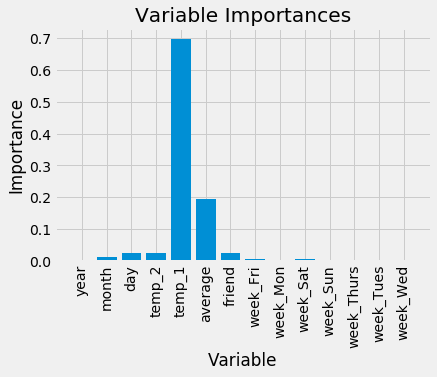

In [8]:
'''樹模型視覺化'''
from sklearn.tree import export_graphviz
import pydot

'''取一棵樹'''
tree=rf.estimators_[5]

'''匯出 dot 檔'''
export_graphviz(tree,out_file='tree.dot',feature_names=features_list,rounded=True,precision=1)

'''畫圖'''
(graph,)=pydot.graph_from_dot_file('tree.dot')

'''展示'''
graph.write_png('tree.png')

'''修剪一下樹模型'''
rf_small=RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
rf_small.fit(features_train,labels_train)

'''分析一棵樹'''
tree_small=rf_small.estimators_[5]

'''儲存、畫圖'''
export_graphviz(tree_small,out_file='small_tree.dot',
                feature_names=features_list,rounded=True,precision=1)
(graph,)=pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

'''列出特徵的重要度'''
importances=list(rf.feature_importances_)
# print(importances)

'''轉換格式'''
feature_importances=[(feature,round(importance,2)) for feature, importance
                     in zip(features_list,importances)]
'''round:在小數第幾位做四捨五入'''
# print()
# print(feature_importances)
# print(type(feature_importances))

'''以 key 為比較對象，由大到小做排序'''
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)
# print(feature_importances)

'''印出特徵以及其對於模型的重要度'''
print()
[print('Variable:{:20}Importance:{}'.format(*pair)) for pair in feature_importances]

'''將特徵重要度畫成長條圖'''

'''重要度'''
x_values=list(range(len(importances)))

'''長條圖'''
plt.figure()
plt.bar(x_values,importances,orientation='vertical')

'''特徵名稱'''
plt.xticks(x_values,features_list,rotation='vertical')

'''軸名稱'''
plt.ylabel('Importance')
plt.xlabel('Variable')

'''圖名'''
plt.title('Variable Importances')
plt.show()
# 這邊看到 temp_1、average 是較重要的特徵





Mean Absolute Error: 3.92 degrees.

MAPE= 6.229055723613811


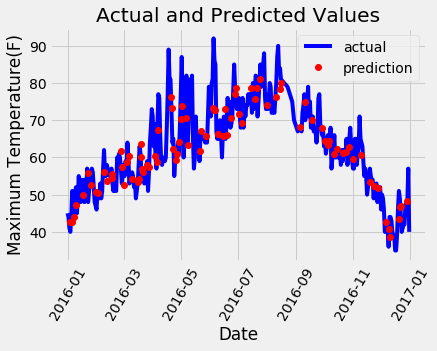

'由圖顯示模型基本掌握天氣變化情況'

In [9]:
'''用兩個重要的特徵重新訓練一次'''
rf_most_importance=RandomForestRegressor(n_estimators=1000,random_state=42)

'''拿出 temp_1、average 的訓練集、測試集'''
importance_indices=[features_list.index('temp_1'),features_list.index('average')]
train_impor=features_train.iloc[:,importance_indices]
test_impor=features_test.iloc[:,importance_indices]

'''重新訓練、預測'''
rf_most_importance.fit(train_impor,labels_train)
pred_impor=rf_most_importance.predict(test_impor)
errors=abs(pred_impor-labels_test)
print()
print('Mean Absolute Error:',round(np.mean(errors),2),'degrees.')
mape=np.mean(100*(errors/labels_test))
print()
print('MAPE=',mape)
'''以重要特徵訓練的模型損失值反而上升了，所以不能只用重要特徵去建模'''


'''接下來比較預測值跟真實值的差異'''

'''資料的日期'''
true_data=pd.DataFrame(data={'date':dates,'actual':labels})

'''測試集的日期'''
months=features_test.iloc[:,features_list.index('month')]
days=features_test.iloc[:,features_list.index('day')]
years=features_test.iloc[:,features_list.index('year')]

'''日期拼接及格式轉換'''
test_dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day))
            for year,month,day in zip(years,months,days)]
# print(test_dates)
test_dates=[datetime.datetime.strptime(date,'%Y-%m-%d')
            for date in test_dates]
# print(test_dates)

predictions_data=pd.DataFrame(data={'date':test_dates,'prediction':labels_pred})

'''真實值'''
plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')

'''預測值'''
plt.plot(predictions_data['date'],predictions_data['prediction'],'ro',label='prediction')
plt.xticks(rotation='60')
plt.legend()

'''圖名'''
plt.xlabel('Date')
plt.ylabel('Maximum Temperature(F)')
plt.title('Actual and Predicted Values')

plt.show()
'''由圖顯示模型基本掌握天氣變化情況'''